# Investigating Fandango Movie Ratings
In 2015, Walt Hickey analyzed Fandango's displayed movie ratings vs their actual ratings and posted [his findings](https://fivethirtyeight.com/features/fandango-movies-ratings/) on FiveThirtyEight. In Hickey's analysis, it was discovered that the actual rating (found in the HTML of the page) differed from the displayed star rating on the website. The ratings were being rounded up to the nearest half star value, so 4.1 became 4.5. Fandango replied that the rounding error was a bug, promised to fix it, and the actual value in the HTML was removed. 

The goal of this project is to analyze the Fandango movie ratings to see if there were changes to their rating system after Hickey's analysis was posted. The movie ratings data before Hickey's findings were uploaded to github [here](https://github.com/fivethirtyeight/data/tree/master/fandango). The data for ratings after Hickey's analysis was uploaded to github [here](https://github.com/mircealex/Movie_ratings_2016_17).

## Reading in the data
The pre-analysis data will be read in from ```fandango_score_comparison.csv``` and the post-analysis data will be read in from ```movie_ratings_16_16.csv```. 

In [76]:
import pandas as pd
pre_analysis = pd.read_csv('fandango_score_comparison.csv')
post_analysis = pd.read_csv('movie_ratings_16_17.csv')

In [77]:
pre_analysis.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [78]:
post_analysis.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


## Relevant columns
We will isolate the following columns from the pre-analysis data:
* ```FILM```
* ```Fandango_Stars```
* ```Fandango_Ratingvalue```
* ```Fandango_votes```
* ```Fandango_Difference```

The following columns will be isolated from the post-analysis data:
* ```movie```
* ```year```
* ```fandango```

In [79]:
fandango_pre = pre_analysis[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_post = post_analysis[['movie', 'year', 'fandango']]

In [80]:
fandango_pre.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [81]:
fandango_post.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Since we are trying to see if there is a change in Fandango's rating system after Hickey's analysis, the population will be all of Fandango's movie ratings. Hickey's pre-analysis dataset is not randomly sampled since the movies had to have at least 30 ratings and tickets on sale during 2015. The post-analysis dataset is also not random, since it is made up of 214 of the "most popular movies" with a significant number of votes. 

This may cause the samples to not be representative of our entire population since they may be affected by the time period their movies are being pulled from.

## Changing our goal
In order to make the samples more representative of our population, we can change our population to *only* movies popular in 2015 and 2016 and compare the differences between those ratings. We can use Hickey's requirement of at least 30 ratings as a popular movie. This means we know the pre-analysis data are all popular movies. However, we will need to investigate the post-analysis data further since it does not tell us the number of ratings for a movie. 

We can sample 10 movies from 2016 in the post-analysis dataset and check their IMDB page to see how many ratings it has. 

In [82]:
fandango_post[fandango_post.year == 2016].sample(10, random_state=1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


After looking these movies up, it looks like they have received more than 30 ratings each. We can go ahead and use the 2016 movies from the post-analysis dataset. We will now need to isolate all of the movies released in 2015 and the movies released in 2016 in two separate datasets. 

In [83]:
fandango_pre_copy = fandango_pre.copy()
fandango_pre_copy['year'] = fandango_pre['FILM'].apply(lambda x: x.replace(')','').split('('))
fandango_pre_copy['year'] = fandango_pre_copy['year'].apply(lambda x: x[1])
fandango_pre_copy['FILM'] = fandango_pre_copy['FILM'].apply(lambda x: x.replace('(2015)', ''))
fandango_pre_2015 = fandango_pre_copy[fandango_pre_copy.year == '2015']
fandango_pre_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015


In [88]:
fandango_post_2016 = fandango_post[fandango_post.year == 2016]
fandango_post_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Analyzing Rating Density
In order to see the difference from the pre-analysis ratings and the post-analysis ratings, we will be plotting the ratings on a kernel density plot. This will allow us to see if there has been a shift in the ratings after Hickey's analysis. Since the ratings have only been rounded upwards, we would expect the density of the ratings to fall from mostly being at 4.5 to something lower. 

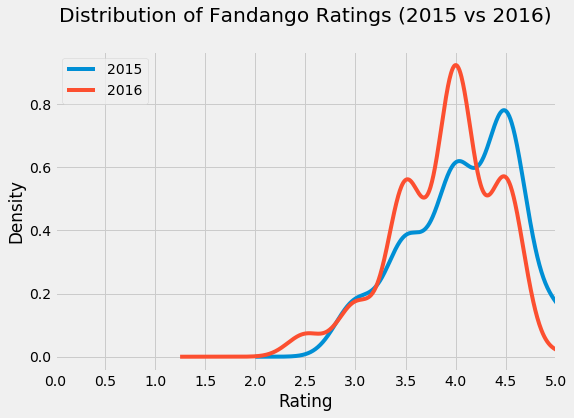

In [103]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
xticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.style.use('fivethirtyeight')

fandango_pre_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8, 5.5))
fandango_post_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Distribution of Fandango Ratings (2015 vs 2016)", y = 1.07)
plt.xlabel("Rating")
plt.xlim(0,5)
plt.xticks(xticks)
plt.show()

From the visualization above, we can see that the 2015 ratings were mostly around the 4.5 stars mark and that there were almost nothing at 2.5 and below. After the analysis, the ratings were shifted left and most of the ratings are now at the 4.0 stars mark. It also shows that there are now movies with ratings at 2.5 stars, showing that Fandango may have changed the rating system to round down. This could also just mean that the movies in 2016 were rated lower than the 2015 movies. 

Both distributions are skewed left, showing that movies on Fandango are rated highly. This is interesting since they also sell movie tickets and they would have motivation to show movies with higher ratings. 

## Comparing Relative Frequencies
Since the two datasets have a different number of movies we will need to normalize both of them and then we can compare the frequencies of ratings between the datasets. We will also express the frequencies in percentages to make them easier to read.

In [104]:
print('2015')
fandango_pre_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [105]:
print('2016')
fandango_post_2016['fandango'].value_counts(normalize=True).sort_index()*100

2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the frequency distribution tables above, we can see that there is still a clear difference between thw two distributions. The ratings shifted to being lower overall for 2016, although it is not as clear as the kernel density plots. 

## Comparing mean, median, and mode

In [110]:
mean_2015 = fandango_pre_2015['Fandango_Stars'].mean()
median_2015 = fandango_pre_2015['Fandango_Stars'].median()
mode_2015 = fandango_pre_2015['Fandango_Stars'].mode()[0]

mean_2016 = fandango_post_2016['fandango'].mean()
median_2016 = fandango_post_2016['fandango'].median()
mode_2016 = fandango_post_2016['fandango'].mode()[0]

In [113]:
avg_2015 = {'mean': mean_2015,
            'median': median_2015,
            'mode': mode_2015}
avg_2016 = {'mean': mean_2016,
            'median': median_2016,
            'mode': mode_2016}
print('2015 averages')
print(avg_2015)
print('\n')
print('2016 averages')
print(avg_2016)

2015 averages
{'mean': 4.0852713178294575, 'median': 4.0, 'mode': 4.5}


2016 averages
{'mean': 3.887434554973822, 'median': 4.0, 'mode': 4.0}


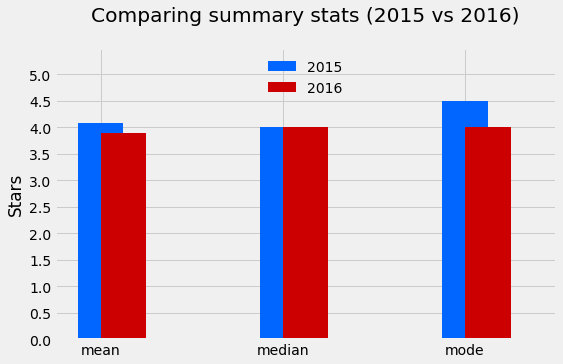

In [150]:
averages = pd.DataFrame.from_dict(avg_2015, orient='index', columns=['2015'])
averages['2016'] = [avg_2016['mean'], avg_2016['median'], avg_2016['mode']]

plt.style.use('fivethirtyeight')

averages['2015'].plot.bar(color='#0066FF', align='center', label='2015', width=.25)
averages['2016'].plot.bar(color='#CC0000', align='edge', label='2016', rot=0, figsize=(8,5), width=.25)

plt.title('Comparing summary stats (2015 vs 2016)', y=1.07)
plt.ylim(0, 5.5)
plt.yticks(arange(0, 5.1, .5))
plt.ylabel('Stars')
plt.legend(framealpha=0, loc='upper center')
plt.show()

The 2016 dataset has a slightly lower mean by 0.2 stars and the mode drops from 4.5 to 4.0. This shows the 2016 dataset does have slightly lower ratings than the 2015 dataset, but the center is still around 4.0. 

# Conclusion
Our analysis shows that the 2016 movie ratings were slightly lower than the 2015 movie ratings on Fandango's website for popular movies (movies with > 30 ratings). This does not mean Fandango definitely changed their biased rating system, but there is a high chance that they did based off of these findings. 